<a href="https://colab.research.google.com/github/Arulprakash1/learnflow/blob/main/health_insurance_claim_predicttion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HEALTH INSURANCE CLAIM PREDICTION**

# IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# LOAD THE DATASET

In [2]:
df=pd.read_csv('/content/insurance3r2.csv')

# DATA EXPLORATION

In [4]:
df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


In [5]:
df.tail()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
1333,50,1,30.97,4008,3,0,1,10600.5483,0
1334,18,0,31.92,3003,0,0,0,2205.9808,1
1335,18,0,36.85,3008,0,0,2,1629.8335,1
1336,21,0,25.80,8009,0,0,3,2007.9450,0
1337,61,0,29.07,8008,0,1,1,29141.3603,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


In [9]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
steps,0
children,0
smoker,0
region,0
charges,0
insuranceclaim,0


In [11]:
df.columns


Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [8]:
df.describe()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


# HANDLING MISSING VALUES

Fill missing numerical values with mean or median

In [15]:
df.fillna(df.mean(), inplace=True)

 For categorical variables, fill with the most frequent value

In [16]:
df.fillna(df.mode().iloc[0], inplace=True)

# ENCODE CATEGORICAL VARIABLE

In [17]:
label_encoder = LabelEncoder()

In [22]:
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])


# FEATURE SCALING

In [24]:
X = df.drop('insuranceclaim', axis=1)
y = df['insuranceclaim']

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# TRAIN-TEST-SPLIT

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# TRAIN MODEL

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

# PREDICTION

In [28]:
y_pred = model.predict(X_test)

# MODEL EVALUATION

ACCURACY

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')



Accuracy: 0.86


CLASSIFIACTION REPORT

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       107
           1       0.90      0.86      0.88       161

    accuracy                           0.86       268
   macro avg       0.85      0.86      0.86       268
weighted avg       0.86      0.86      0.86       268



CONFUSION MATRIX

In [32]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


[[ 92  15]
 [ 22 139]]


VISUALIZATION

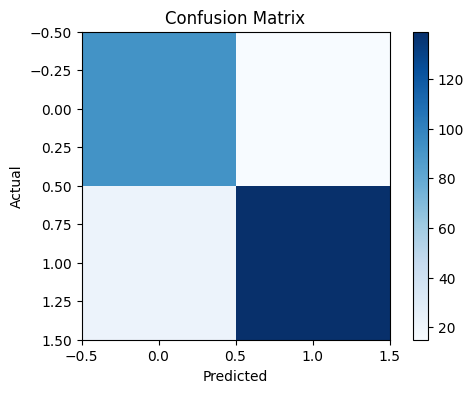

In [33]:
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SAVE AND DEPLOY MODEL

In [34]:
import joblib
joblib.dump(model, 'insurance_claim_prediction_model.pkl')



['insurance_claim_prediction_model.pkl']